# Business Understanding

eCommerce has taken over the retail space making it close to impossible for brick and mortar stores to compete with larger retailers such as Amazon, Target, or Walmart.  Over the years we have seen stores begin to close their doors due to the innability to keep up with online competitors.

Goodreads is an online social platform which gives readers the ability to share and rank their most recent books read.  Once a user marks a book read or rates the book, the platform will recommend a new book to the user. A recent study was done which showed 93% of customers will read online reviews prior to purchasing. 

Barnes and Noble is looking to understand what books should be showcased in their stores.  They are looking to get ahead of the game by utilizing a model which can predict the rating of a book on the most ppular book reviewed site.

Barnes and Noble is looking to rebrand their company by partnering with goodreads.  They are looking for a model to be created which can predict what a customer will rank a book before even reading.  A recent study was done which showed 93% of customers will read online reviews prior to purchasing.  By focusing on a predictive model, this will help retain customers by creating a new avenue of personalization.

# Data Understanding

This dataset contains more than 1.3M book reviews about 25,475 books and 18,892 users.  It was found through the Kaggle Good Reads Book Competition.  A train & test set are provided.

The dataset of this competition is taken from UCSD Book Graph.

## Import Packages

Import necessary packages to load datasets and begin EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Load both the train and test CSV to view what each entails.

In [2]:
df = pd.read_csv("Data/goodreads_train.csv")

## Previewing Data

Load information on train dataset.

### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


### Data Head

View first five rows of train dataset.

In [4]:
df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [5]:
df.tail()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0
899999,b9450d1c1f97f891c392b1105959b56e,17005,d55f3a967230940e75a314700caec9a5,3,** spoiler alert ** \n 3.5 stars \n I liked it...,Sun Nov 11 00:05:43 -0800 2012,Sun Nov 11 21:59:08 -0800 2012,Sun Nov 11 00:00:00 -0800 2012,Sun Nov 11 00:00:00 -0800 2012,0,0


## Data Preperation

### Null Values

Looking at the null values we will be able to make a better decision on what to do with those two columns once we explore the data a little deeper.

In [6]:
df.isna().sum()

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
dtype: int64

In [7]:
df.read_at = df.read_at.fillna(value = "0")

In [8]:
df.started_at = df.started_at.fillna(value = "N/A")

In [9]:
df.isna().sum()

user_id         0
book_id         0
review_id       0
rating          0
review_text     0
date_added      0
date_updated    0
read_at         0
started_at      0
n_votes         0
n_comments      0
dtype: int64

## Exploring Columns

### user_id

User Id is the numerical number given to a user.  This is their unique identifier.  There are 12,188 User id's in this dataset.

In [10]:
user = len(pd.unique(df['user_id']))
  
print("No.of.unique values :", 
      user)

No.of.unique values : 12188


### book_id

Book Id is the numerical number given to a book.  This is their unique identifier.  There are 25,474 book id's in this dataset.

In [11]:
book = len(pd.unique(df['book_id']))
  
print("No.of.unique values :", 
      book)

No.of.unique values : 25474


### review_id

Review id is the numerical number given to an individual review.  There are 900,000 unique reviews within this dataset.  This means that that every row is an individual review.

In [12]:
review = len(pd.unique(df['review_id']))
  
print("No.of.unique values :", 
      review)

No.of.unique values : 900000


### rating

Rating is the number which is given during a review.  0 is the lowest score you can receive and 5 is the highest score you can receive.

In [13]:
df['rating'].value_counts()

4    313688
5    265007
3    188972
2     72627
0     30988
1     28718
Name: rating, dtype: int64

### n_votes

Votes is the number of votes which a review contains.

In [14]:
df['n_votes'].value_counts(normalize=True)

0       0.581260
1       0.157020
2       0.069991
3       0.040274
4       0.026211
          ...   
894     0.000001
591     0.000001
291     0.000001
387     0.000001
1023    0.000001
Name: n_votes, Length: 540, dtype: float64

In [15]:
n_votes_data = df.groupby('rating').mean()['n_votes'].sort_values().reset_index()

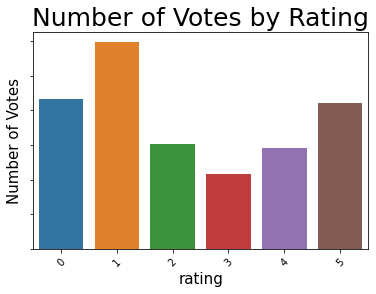

In [16]:
ax = sns.barplot(x = 'rating', y = 'n_votes', data=n_votes_data)
ax.set_xlabel('rating', size = 15)
ax.set_ylabel('Number of Votes', size = 15)
ax.set_title('Number of Votes by Rating', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

### n_comments

In [17]:
df['n_comments'].value_counts(normalize=True)

0      0.837780
2      0.040009
1      0.039028
3      0.017184
4      0.014027
         ...   
221    0.000001
222    0.000001
223    0.000001
225    0.000001
170    0.000001
Name: n_comments, Length: 236, dtype: float64

In [18]:
n_comments_data = df.groupby('rating').mean()['n_comments'].sort_values().reset_index()

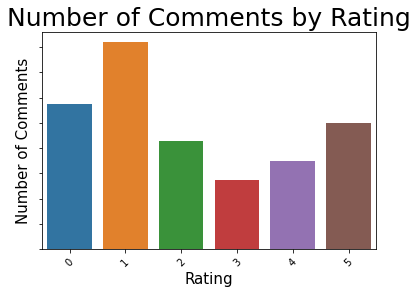

In [19]:
ax = sns.barplot(x = 'rating', y = 'n_comments', data=n_comments_data)
ax.set_xlabel('Rating', size = 15)
ax.set_ylabel('Number of Comments', size = 15)
ax.set_title('Number of Comments by Rating', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

## Word Cloud

In [20]:
Five_rating = " ".join(review for review in df[df["rating"]==5]['review_text'])
Four_Rating = " ".join(review for review in df[df["rating"]==4]['review_text'])
Three_Rating = " ".join(review for review in df[df["rating"]==3]['review_text'])
Two_Rating = " ".join(review for review in df[df["rating"]==2]['review_text'])
One_Rating = " ".join(review for review in df[df["rating"]==1]['review_text'])

### Word Cloud Five Rating

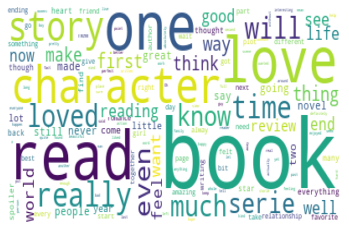

In [21]:
from wordcloud import WordCloud

wordcloud_five = WordCloud(collocations=False,background_color="white", max_words=150).generate(Five_rating)

# Display the generated image:
plt.imshow(wordcloud_five, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud Four Rating

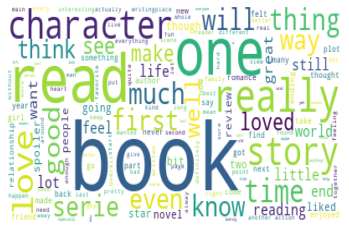

In [22]:
from wordcloud import WordCloud

wordcloud_four = WordCloud(collocations=False,background_color="white", max_words=150).generate(Four_Rating)

# Display the generated image:
plt.imshow(wordcloud_four, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud Three Rating

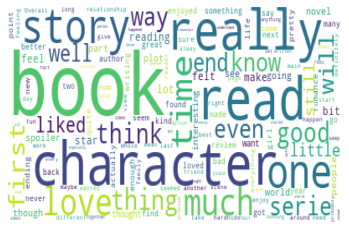

In [23]:
from wordcloud import WordCloud

wordcloud_three = WordCloud(collocations=False,background_color="white", max_words=150).generate(Three_Rating)

# Display the generated image:
plt.imshow(wordcloud_three, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud Two Rating

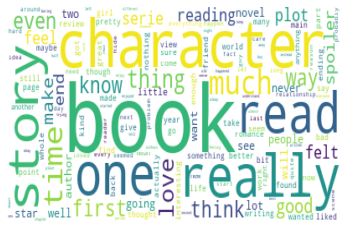

In [24]:
from wordcloud import WordCloud

wordcloud_two = WordCloud(collocations=False,background_color="white", max_words=150).generate(Two_Rating)

# Display the generated image:
plt.imshow(wordcloud_two, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud One Rating

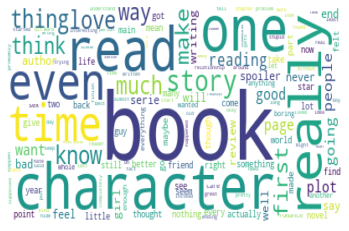

In [25]:
from wordcloud import WordCloud

wordcloud_one = WordCloud(collocations=False,background_color="white", max_words=150).generate(One_Rating)

# Display the generated image:
plt.imshow(wordcloud_one, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

## Drop Columns

In [26]:
df.drop(columns=['user_id', 'book_id', 'review_id', 'date_added', 'date_updated',
                'started_at', 'read_at', 'n_votes', 'n_comments'], inplace = True)

In [27]:
df.head()

,rating,review_text
0,5,This is a special book. It started slow for ab...
1,3,Recommended by Don Katz. Avail for free in Dec...
2,3,"A fun, fast paced science fiction thriller. I ..."
3,0,Recommended reading to understand what is goin...
4,4,"I really enjoyed this book, and there is a lot..."


# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop("rating", axis = 1)
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

# Standardizing

In [ ]:
import nltk
nltk.download('wordnet')


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


X_train['review_text']=X_train['review_text'].map(lambda s:preprocess(s))
X_test['review_text']=X_test['review_text'].map(lambda s:preprocess(s))